In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## CART1

In [2]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier1:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
        else:
            # find the best split
            best_feature, best_thresh = self._best_split(X, y, feat_idxs)
            
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity 

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X_column, thr)

                if gain!=0 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold
    

    def impurity_gain(self, y, X_column, threshold):
        '''Calculates impurity for particular split'''
        # create subsets
        left_subset, right_subset = self._split(X_column, threshold)

        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_subset), len(right_subset)
        gini_l, gini_r = self.gini_index(y[left_subset]), self.gini_index(y[right_subset])
        
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
        
    #function to split data into two parts
    def _split(self, X, split_thresh):
        '''Splits data based on the threshold value'''
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        right_idxs = np.argwhere(X > split_thresh).flatten()
        return  left_idxs, right_idxs

    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART2

In [3]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier2:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity 

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    #print("best_thresh", best_feature,best_thresh)
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) >= 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X_column, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                    #print('thr',split_idx,split_threshold)
        #print(best_gain,split_threshold,split_idx)

        return split_idx, split_threshold
    

    def impurity_gain(self, y, X_column, threshold):
        '''Calculates impurity for particular split'''
        # create subsets
        left_subset, right_subset = self._split(X_column, threshold)

        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_subset), len(right_subset)
        gini_l, gini_r = self.gini_index(y[left_subset]), self.gini_index(y[right_subset])
        
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
       # return (len(left_subset)/len(y))*self.gini_index(y[left_subset]) + ((len(right_subset)/len(y))*self.gini_index(y[right_subset]))
    
    #function to split data into two parts
    def _split(self, X, split_thresh):
        '''Splits data based on the threshold value'''
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        right_idxs = np.argwhere(X > split_thresh).flatten()
        return  left_idxs, right_idxs

    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART3

In [4]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier3:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
   # def gini_index(self,labels):
       # counts = np.bincount(labels)
        #probabilities = counts / len(labels)
        #return 1 - np.sum(probabilities**2)
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) >= 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
                #print(thresholds)
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X,feat_idx, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                  
        return split_idx, split_threshold
    

    def impurity_gain(self, y,X, feat, threshold):
        '''Calculates impurity for particular split'''
        left_y = y[X[:, feat] <= threshold]
        right_y = y[X[:, feat] > threshold]

        if len(left_y) == 0 or len(right_y) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_y), len(right_y)
        gini_l, gini_r = self.gini_index(left_y), self.gini_index(right_y)
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
    
    
    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART4

In [5]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier4:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self,labels):
        counts = np.bincount(labels)
        probabilities = counts / len(labels)
        return 1 - np.sum(probabilities**2)
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) >= 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
                #print(thresholds)
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X,feat_idx, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                  
        return split_idx, split_threshold
    

    def impurity_gain(self, y,X, feat, threshold):
        '''Calculates impurity for particular split'''
        left_y = y[X[:, feat] <= threshold]
        right_y = y[X[:, feat] > threshold]

        if len(left_y) == 0 or len(right_y) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_y), len(right_y)
        gini_l, gini_r = self.gini_index(left_y), self.gini_index(right_y)
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
    
    
    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

### Function to split our data into train and test

In [6]:
def TrainTestSplit(X,y,test_size,random_state=None):
    np.random.seed(random_state)    #Random Number Generator
    permuted_indices = np.random.permutation(len(X))     #Shuffling indexes  
    test_size = int(test_size * len(X))
    test_indices = permuted_indices[:test_size]
    train_indices = permuted_indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

### Functions for Evaluation Metrics

In [7]:

def accuracy_score(y_true, y_pred):
    TP = sum(y_true & y_pred)
    FP = sum(1-y_true & y_pred ) 
    TN = sum(1-y_true & 1-y_pred)
    FN = sum(y_true & 1-y_pred)
    return (TP+TN)/(TP+TN+FP+FN)

def precision(y_true,y_pred):
    TP = sum(y_true & y_pred) 
    FP = sum(1-y_true & y_pred )
    
    return (TP/(TP+FP))

def recall(y_true, y_pred):
    TP = sum(y_true & y_pred)
    FN = sum(y_true & 1-y_pred)
    return ((TP)/(TP+FN))

def f1_score(y_true, y_pred):
    Recall = recall(y_true, y_pred)
    Precision = precision(y_true, y_pred)
    
    return 2*(Recall*Precision)/(Recall+Precision)

In [8]:
cart1=DecisionTreeClassifier1()
cart2=DecisionTreeClassifier2()
cart3=DecisionTreeClassifier3()
cart4=DecisionTreeClassifier4()
dt=DecisionTreeClassifier()

## 1. Testing on HR-Employee-Attrition Data

In [9]:
#Loading sample data 
df = pd.read_csv("E:\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
X = df.drop(columns=['Attrition','EmployeeNumber','EmployeeCount'], axis = 1)
y = df['Attrition']

In [11]:
# label encoder for target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [12]:
#Encoding all attributes using get_dummies
X = pd.get_dummies(X, drop_first = True)
X = X.values

In [13]:
#train_test_split
x_train, x_test, y_train, y_test = TrainTestSplit(X,y,test_size = 0.25,random_state = 1)

In [14]:
models={
    "CART_Classifier1":cart1,
    "CART_Classifier2":cart2,
    "CART_Classifier3":cart3,
    "CART_Classifier4":cart4,
    "DecisionTreeClassifier":dt
}

In [25]:
#model building and evaluation
modl = []
accuracy = []
preci = []
recall_ = []
f1 = [] 
tim = []
for name, model in models.items():
    #print("***********************************",name,"******************************************")
    start = time.time()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    modl.append(name)
    accuracy.append(round(accuracy_score(y_test,pred)*100,2))
    preci.append(round(precision(y_test,pred)*100,2))
    recall_.append(round(recall(y_test,pred)*100,2))
    f1.append(round(f1_score(y_test,pred)*100,2))
    tim.append(time.time()-start)
    
data = list(zip(modl,accuracy,preci,recall_,f1,tim))
result_table = pd.DataFrame(data,columns =["Algorithm","Accuracy in %","Precision in %","Recall","F1_score","Time in Sec"])
result_table

,Algorithm,Accuracy in %,Precision in %,Recall,F1_score,Time in Sec
0,CART_Classifier1,90.85,92.00,83.64,87.62,4.671061
1,CART_Classifier2,92.96,92.45,89.09,90.74,0.078113
2,CART_Classifier3,93.66,94.23,89.09,91.59,0.080286
3,CART_Classifier4,93.66,94.23,89.09,91.59,0.046864
4,DecisionTreeClassifier,95.77,98.04,90.91,94.34,0.001887


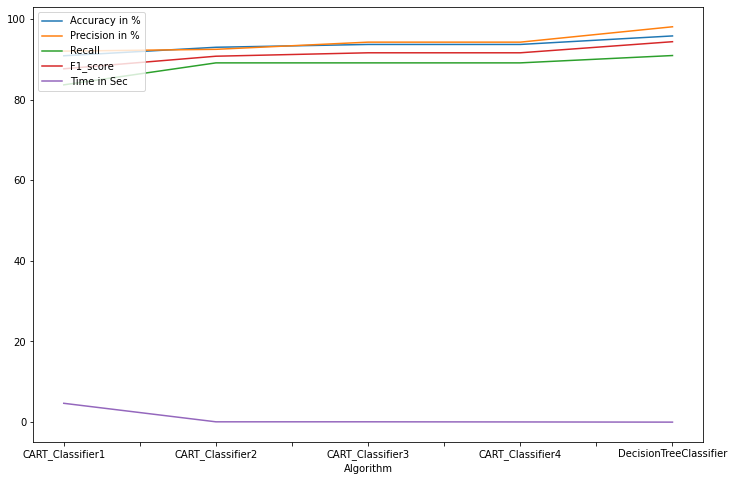

In [26]:
ax = result_table.plot.line(figsize=(12,8),x='Algorithm')
plt.legend(loc =2)

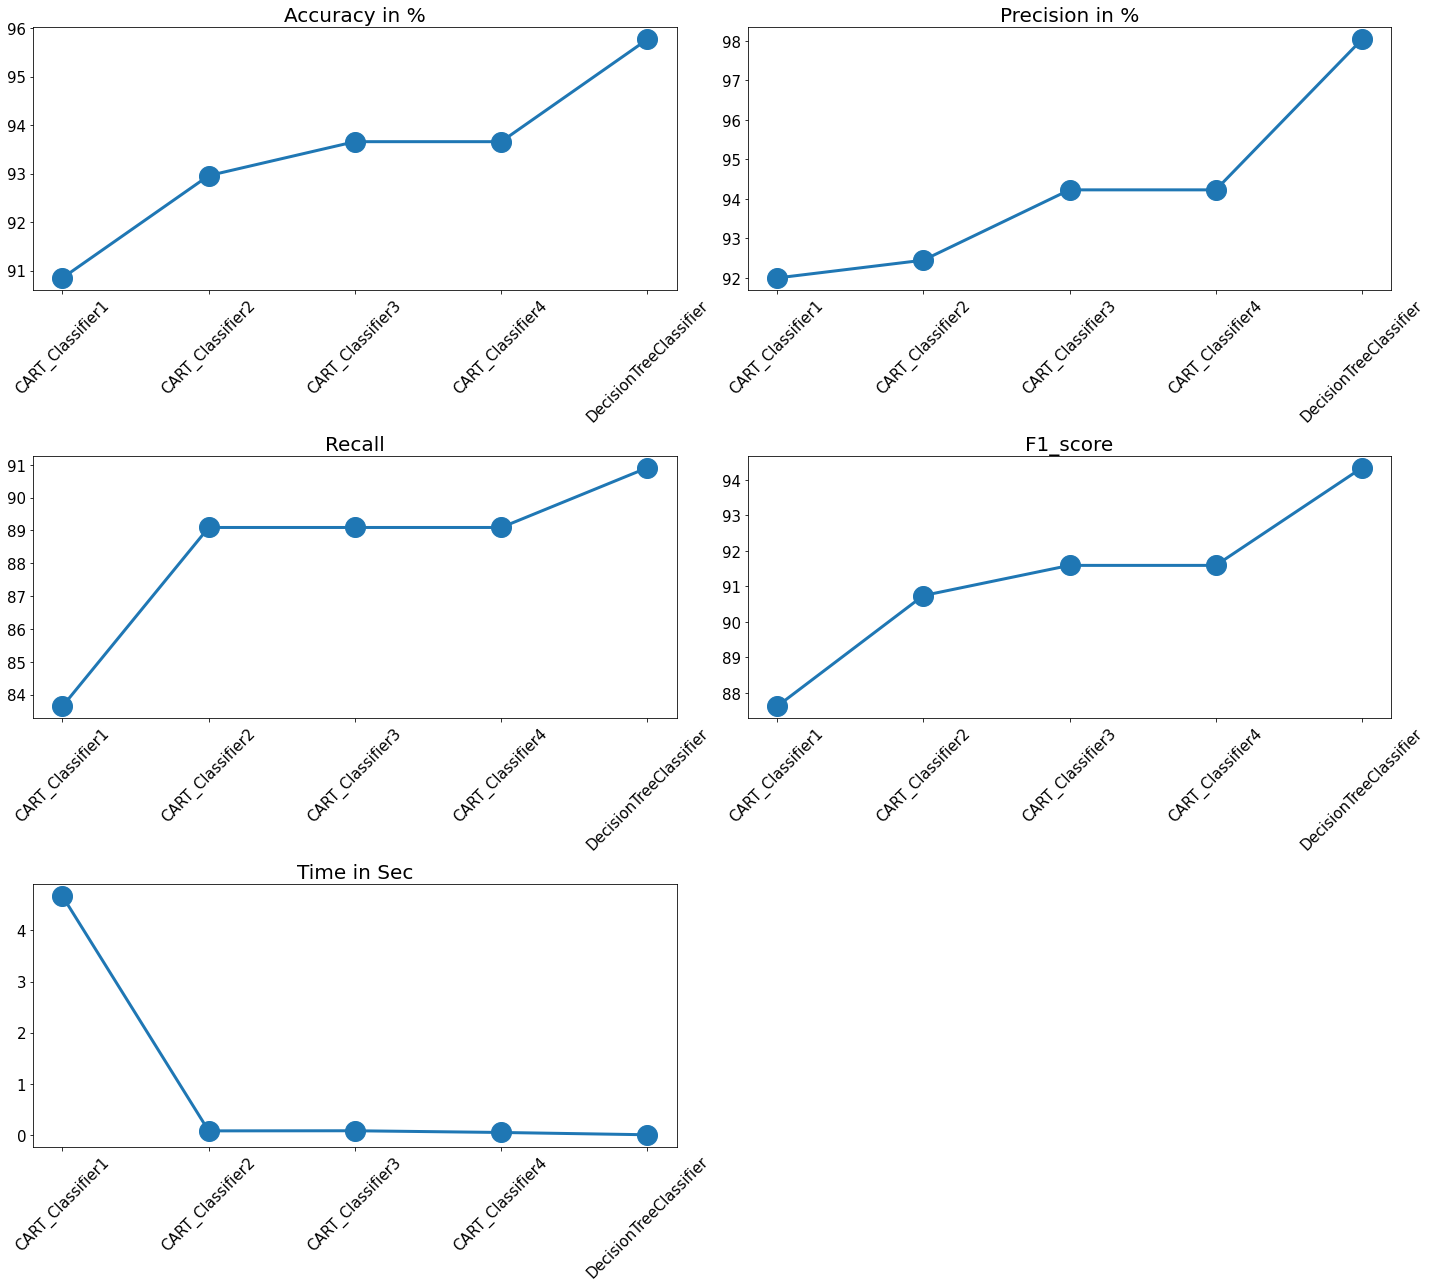

In [27]:
col=['Accuracy in %','Precision in %','Recall','F1_score','Time in Sec']
plt.figure(figsize=(20,18))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.plot(result_table['Algorithm'],result_table[col[i]],linewidth=3, marker = 'o', markersize = 20)
    plt.title(col[i],fontsize=20)
    plt.xticks(rotation = 45)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

## 2. Testing on Cancer Data

In [28]:
#Load the data set
df1 = pd.read_csv("cancer.csv")
df1

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
#Check for missing values
df1.isna().sum()

diagnosis(1=m, 0=b)        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [30]:
#selecting only the attribute columns
X = df1.iloc[:,1:].values
#selecting only the target column
y = df1.iloc[:,0].values

In [31]:
x_train, x_test, y_train, y_test = TrainTestSplit(X,y,test_size = 0.25,random_state = 1)

In [32]:
#model building and evaluation
modl = []
accuracy = []
preci = []
recall_ = []
f1 = [] 
tim = []
for name, model in models.items():
    #print("***********************************",name,"******************************************")
    start = time.time()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    modl.append(name)
    accuracy.append(round(accuracy_score(y_test,pred)*100,2))
    preci.append(round(precision(y_test,pred)*100,2))
    recall_.append(round(recall(y_test,pred)*100,2))
    f1.append(round(f1_score(y_test,pred)*100,2))
    tim.append(time.time()-start)
    
data = list(zip(modl,accuracy,preci,recall_,f1,tim))
result_table = pd.DataFrame(data,columns =["Algorithm","Accuracy in %","Precision in %","Recall","F1_score","Time in Sec"])
result_table

,Algorithm,Accuracy in %,Precision in %,Recall,F1_score,Time in Sec
0,CART_Classifier1,95.07,91.38,96.36,93.81,5.058522
1,CART_Classifier2,89.44,91.67,80.00,85.44,0.079484
2,CART_Classifier3,92.96,94.12,87.27,90.57,0.079358
3,CART_Classifier4,92.96,94.12,87.27,90.57,0.050659
4,DecisionTreeClassifier,93.66,91.07,92.73,91.89,0.000000


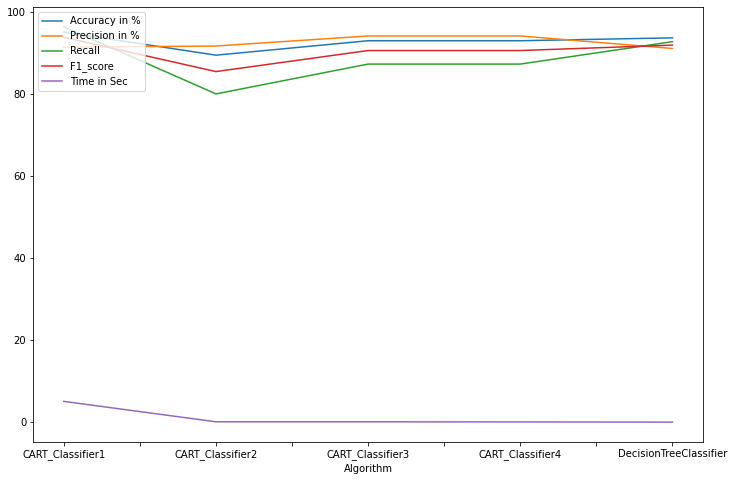

In [33]:
ax = result_table.plot.line(figsize=(12,8),x='Algorithm')
plt.legend(loc =2)

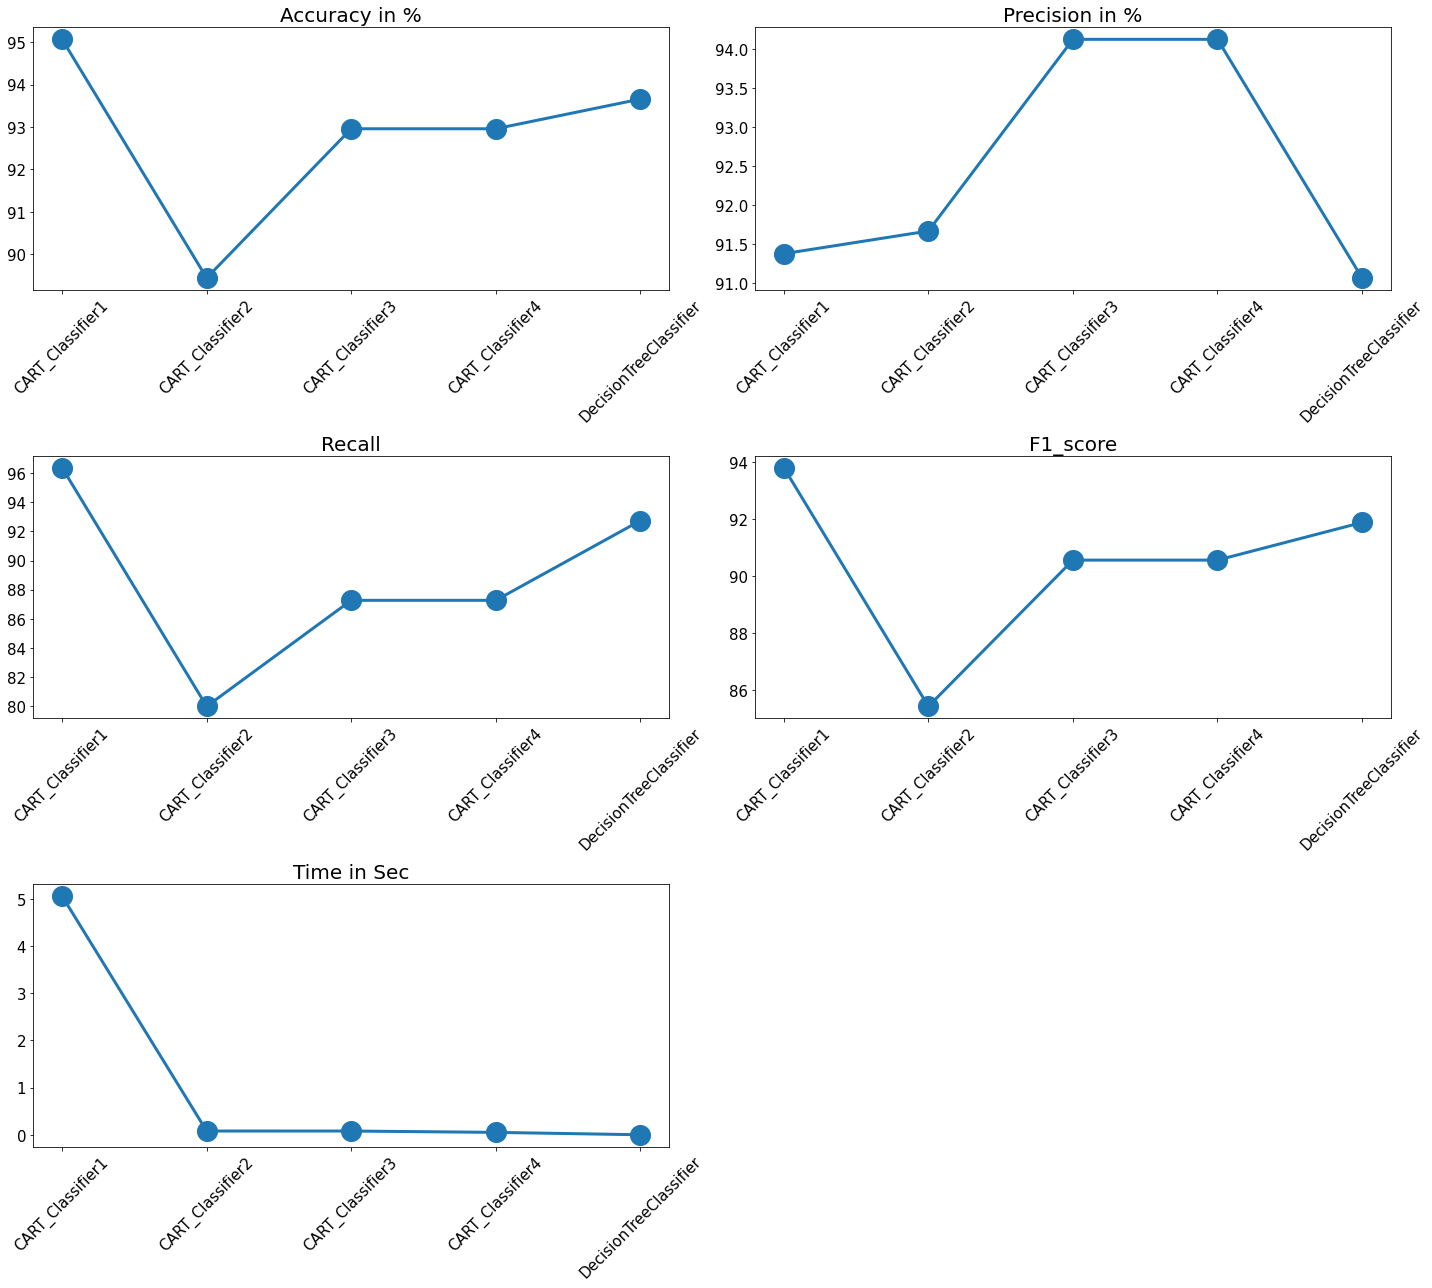

In [34]:
col=['Accuracy in %','Precision in %','Recall','F1_score','Time in Sec']
plt.figure(figsize=(20,18))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.plot(result_table['Algorithm'],result_table[col[i]],linewidth=3, marker = 'o', markersize = 20)
    plt.title(col[i],fontsize=20)
    plt.xticks(rotation = 45)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()